<a href="https://colab.research.google.com/github/Leo270499/Apuntes/blob/main/PrimeraEntrega_S%C3%A1nchez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primera entrega DS | Predicción de abandono de la Empresa

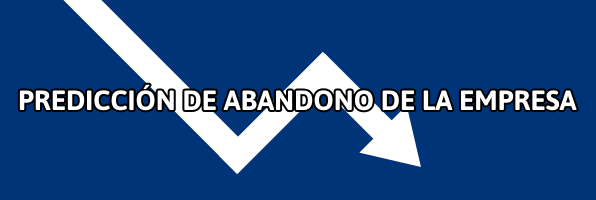

## 1 | Introducción

### Abstract

En la era actual de la información y la tecnología, las empresas se encuentran inmersas en un entorno empresarial cada vez más competitivo. La retención de talento y la gestión eficaz de los recursos humanos se han convertido en factores críticos para el éxito y la sostenibilidad de cualquier organización. El abandono de empleados, o la pérdida de personal clave, puede tener un impacto devastador en la productividad y la rentabilidad de una empresa.

El objetivo de este estudio es utilizar algoritmos de machine learning con el fin de crear modelos de clasificación que me permita predecir el abandono de empleados de una empresa. A través de esto, se podrá anticipar y abordar las causas de abandono, permitiendo tomar medidas para retener personal valioso y futuros talentos.

### Motivación y audiencia

**Motivación**

La motivación detrás de este proyecto de Data Science es abordar uno de los desafíos más urgentes que enfrentan las organizaciones en la actualidad: la retención de talento. La alta rotación de empleados y la pérdida de personal valioso pueden tener un impacto significativo en la estabilidad y el éxito de una empresa.

Este proyecto busca proporcionar a las empresas una herramienta predictiva precisa que les permita tomar medidas proactivas para reducir el abandono de empleados y, en última instancia, mejorar su eficacia y competitividad en el mercado.

**Audiencia**

Este trabajo está destinado a una audiencia diversa como:

1.	**Profesionales de Recursos Humanos:** Este proyecto proporcionará a los especialistas en recursos humanos una herramienta valiosa para predecir el abandono de la empresa y, en consecuencia, tomar medidas preventivas para retener a los empleados.
2.	**Gerentes y Líderes Empresariales:** Los líderes empresariales pueden beneficiarse de este trabajo al comprender mejor cómo los factores internos y externos pueden afectar la retención de empleados, lo que les permite tomar decisiones estratégicas informadas.
3.	**Data Scientists y Analistas:** Aquellos interesados en el campo de Data Science y Machine Learning encontrarán este proyecto como un ejemplo práctico de cómo aplicar estas técnicas en un contexto empresarial y de recursos humanos.
4.	**Empresas y Organizaciones:** Cualquier entidad interesada en mejorar su retención de empleados y su rendimiento general puede beneficiarse de los conocimientos y modelos desarrollados en este proyecto.

En resumen, este proyecto tiene como objetivo servir como un recurso valioso para cualquier persona o entidad interesada en abordar el desafío del abandono de la empresa desde una perspectiva basada en datos y orientada a la toma de decisiones informadas.


### Herramientas y datos

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Librerias
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
PATH = "/content/drive/MyDrive/Coderhouse_ Data Science/6. Primera Entrega (Data Science)/Dataset/Abandono.csv"
df = pd.read_csv(PATH, sep = ';', index_col= 'id', na_values='#N/D')

In [4]:
pd.set_option('display.max_columns', 31)

In [5]:
df.sample(10)

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,implicacion,nivel_laboral,puesto,satisfaccion_trabajo,estado_civil,salario_mes,num_empresas_anteriores,mayor_edad,horas_extra,incremento_salario_porc,evaluacion,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,conciliacion,anos_compania,anos_en_puesto,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1854,42,No,Non-Travel,Research & Development,10,Universitaria,Technical Degree,1,Alta,NaN,Alta,1,Research Scientist,Alta,Married,2936,3,Y,No,22,Muy_Alta,Media,80,2,10,1,NaN,6,3.0,3,3
1428,30,No,Travel_Rarely,Sales,7,Universitaria,Marketing,1,Muy_Alta,3.0,Alta,2,Sales Executive,Alta,Divorced,4779,7,Y,No,14,Alta,Media,80,2,8,3,NaN,3,NaN,0,2
1965,27,No,Travel_Rarely,Sales,9,Universitaria,Marketing,1,Muy_Alta,3.0,Alta,2,Sales Executive,Alta,Single,4105,1,Y,No,14,Alta,Baja,80,0,7,5,NaN,7,NaN,0,7
88,35,No,Travel_Frequently,Research & Development,1,NaN,Medical,1,Media,3.0,Alta,1,Research Scientist,Alta,Married,2194,4,Y,No,13,Alta,Muy_Alta,80,1,5,2,NaN,3,NaN,1,2
451,43,No,Travel_Rarely,Research & Development,7,Universitaria,Life Sciences,1,Alta,3.0,Alta,3,Healthcare Representative,Alta,Married,9985,8,Y,No,16,Alta,Baja,80,1,10,1,NaN,1,NaN,0,0
1700,37,No,Travel_Frequently,Sales,1,Primaria,Medical,1,Alta,1.0,Baja,2,Sales Executive,Baja,Divorced,9525,1,Y,No,14,Alta,Alta,80,2,6,2,Baja,6,NaN,1,3
144,22,No,Travel_Rarely,Research & Development,15,Universitaria,Medical,1,Media,3.0,Alta,1,Laboratory Technician,Alta,Single,2871,1,Y,No,15,Alta,Alta,80,0,1,5,Alta,0,NaN,0,0
336,45,No,Travel_Rarely,Research & Development,1,Master,Other,1,Alta,NaN,Muy_Alta,5,Manager,Muy_Alta,Married,19202,0,Y,No,11,Alta,Alta,80,1,25,2,Muy_Alta,24,NaN,1,7
1043,39,No,Travel_Frequently,Research & Development,22,Universitaria,Medical,1,Muy_Alta,3.0,Alta,3,Manufacturing Director,Alta,Single,10880,1,Y,Yes,13,Alta,Alta,80,0,21,2,NaN,21,NaN,2,8


### Descripción de variables

*   `edad`: Edad del trabajador
*   `abandono`: Variable dummy (0 no abandona, 1 abandona)
*   `viajes`: Lugar donde viajó
*   `departamento`: Oficina a la que pertenece el trabajador.
*   `distancia_casa`: Unidad de lejanía del trabajo (mientras el número es mayor, más lejano)
*   `educacion`: Nivel de estudio en el que se encuentra el trabajador.
*   `carrera`: Carrera que estudio el trabajador.
*   `empleados`: Variable para contar trabajador. (no tiene mucho sentido, se verá en el EDA)
*   `satisfaccion_entorno`: Nivel de sastifacción (Sería bueno que el trabajo se encuentre en un entorno que le resuelte agradable).
*   `sexo`: Sexo del trabajador
*   `implicacion`: Implicación del trabajador en la empresa (nos permitira saber que tan comprometido está).
*   `nivel_laboral`: El nivel laboral nos permite saber que rango ocupa en la empresa.
*   `puesto`: El puesto que tiene el trabajador.
*   `satisfaccion_trabajo`: Esta variable nos permite saber si al trabajador le apasiona el trabajo que realiza.
*   `estado_civil`: Situación en la que se encuentra el trabajador.
*   `salario_mes`: El dinero que percibe mensualmente el trabajador.
*   `num_empresas_anteriores`: Empresas en las que ha laborado el trabajador.
*   `mayor_edad`: Nos permite saber si el trabajador es un adulto.
*   `horas_extra`: Nos permite saber si el empleado está laborando más horas de lo habitual.
*   `incremento_salario_porc`: El incremento salarial del trabajador.
*   `evaluacion`: El resultado que obtuvo en su evaluación.
*   `satisfaccion_companeros`: El nivel de sastifacción en relación a otros trabajadores en la empresa.
*   `horas_quincena`: Horas trabajadas en 15 días, la variable no explica mucho (lo veremos en el EDA).
*   `nivel_acciones`: Nivel de acciones que tiene de la empresa (donde las variables se categorizan desde el nivel del 0 al 3, siendo 3 el máximo)
*   `anos_experiencia`: Años de trayectoria del trabajador.
*   `num_formaciones_ult_ano`: Número de formaciones del trabajador.
*   `conciliacion`: Conciliaciòn del trabajador.
*   `anos_compania`: Años que pertenece a la compañía.
*   `anos_en_puesto`: Años en el que trabaja en su puesto actual.
*   `anos_desde_ult_promocion`: Años desde la última vez que ascendio.
*   `anos_con_manager_actual`: Años con gestor actual.

## 2 | Hipotesis

Para esta primera entrega, hago presente 4 hipotesis:

H1. ¿La variable que más influye en el abandono de la empresa de un trabajador es la sastifacción laboral?

H2. ¿La variable que más influye en el abandono de la empresa de un trabajador es la salario mensual?

H3. ¿La variable que más influye en el abandono de la empresa de un trabajador es el bajo salario?

H4. ¿El bajo nivel educativo influira en el abandono de trabajo?


## 3 | Marco Teorico

### Objetivo

El objetivo principal desde este proyecto de ciencia de datos es desarrollar un modelo de clasificación que prediga el abandono laboral de los empleados. Este modelo tiene la finalidad de ayudar a las organizaciones a identificar los factores que contribuyen al abandono y tomar medidas proactivas para retener a su personal y mejorar la retención de empleados.

### Contexto Comercial

En el entorno empresarial actual, la retención de empleados es un desafío crucial debido a sus costos, impacto en la productividad y la competencia por el talento. La pérdida de empleados clave puede afectar la continuidad operativa y la reputación de la empresa.

### Problema Comercial

El problema comercial que este proyecto busca abordar es la falta de una herramienta predictiva precisa para prever y reducir el abandono de la empresa. Las organizaciones a menudo enfrentan dificultades para identificar a tiempo a los empleados que están en riesgo de abandonar la empresa, lo que limita su capacidad para tomar medidas preventivas. Esta falta de anticipación puede resultar en costos adicionales y la pérdida de talento valioso.

### Contexto analítico

En este proyecto de análisis de datos, se recopilarán y analizarán datos históricos relacionados con el empleo, como satisfacción laboral, rendimiento, antigüedad, compensación y otros factores. Se utilizarán técnicas de Machine Learning y análisis estadístico para crear un modelo que pueda predecir el abandono laboral basado en estos datos.

El enfoque se centra en construir un modelo preciso y descubrir los factores más influyentes en el abandono laboral. También se explorarán métodos para evaluar su efectividad y se considerarán mejoras continuas para mantener su precisión.

## 4 | Análisis Exploratorio de Datos (EDA)

### Análisis Descriptivo

**Estructura del dataset**

In [6]:
df.shape

(1470, 31)

**Información del dataset**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1452 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1394 non-null   object 
 14  estado_c

**Variables con observaciones nulas**

In [8]:
df.isna().sum().sort_values(ascending = False)

anos_en_puesto              1238
conciliacion                1011
sexo                         199
educacion                    101
satisfaccion_trabajo          76
implicacion                   18
edad                           0
nivel_acciones                 0
evaluacion                     0
satisfaccion_companeros        0
horas_quincena                 0
anos_experiencia               0
horas_extra                    0
num_formaciones_ult_ano        0
anos_compania                  0
anos_desde_ult_promocion       0
incremento_salario_porc        0
salario_mes                    0
mayor_edad                     0
num_empresas_anteriores        0
abandono                       0
estado_civil                   0
puesto                         0
nivel_laboral                  0
satisfaccion_entorno           0
empleados                      0
carrera                        0
distancia_casa                 0
departamento                   0
viajes                         0
anos_con_m

In [9]:
# Valores nulos EN PORCENTAJE
porcentaje_nulos = df.isnull().mean() * 100
porcentaje_nulos = porcentaje_nulos.round(2)  # Redondear a 2 cifras decimales
porcentaje_nulos = porcentaje_nulos.sort_values(ascending=False)

print(porcentaje_nulos)

anos_en_puesto              84.22
conciliacion                68.78
sexo                        13.54
educacion                    6.87
satisfaccion_trabajo         5.17
implicacion                  1.22
edad                         0.00
nivel_acciones               0.00
evaluacion                   0.00
satisfaccion_companeros      0.00
horas_quincena               0.00
anos_experiencia             0.00
horas_extra                  0.00
num_formaciones_ult_ano      0.00
anos_compania                0.00
anos_desde_ult_promocion     0.00
incremento_salario_porc      0.00
salario_mes                  0.00
mayor_edad                   0.00
num_empresas_anteriores      0.00
abandono                     0.00
estado_civil                 0.00
puesto                       0.00
nivel_laboral                0.00
satisfaccion_entorno         0.00
empleados                    0.00
carrera                      0.00
distancia_casa               0.00
departamento                 0.00
viajes        

**Decisiones tomadas después de la revisión de Nulos**

* Las variables con más del 50% nulos, serán elimanadas en este caso anos_en_puesto y conciliacion.

* Las variables con poco nulos, debemos analizar en el EDA, para ver como lo imputamos.

In [10]:
df.drop(columns = ['anos_en_puesto','conciliacion'], inplace = True)

### EDA Variables Categóricas

In [11]:
df_cat = df.select_dtypes(include='object')

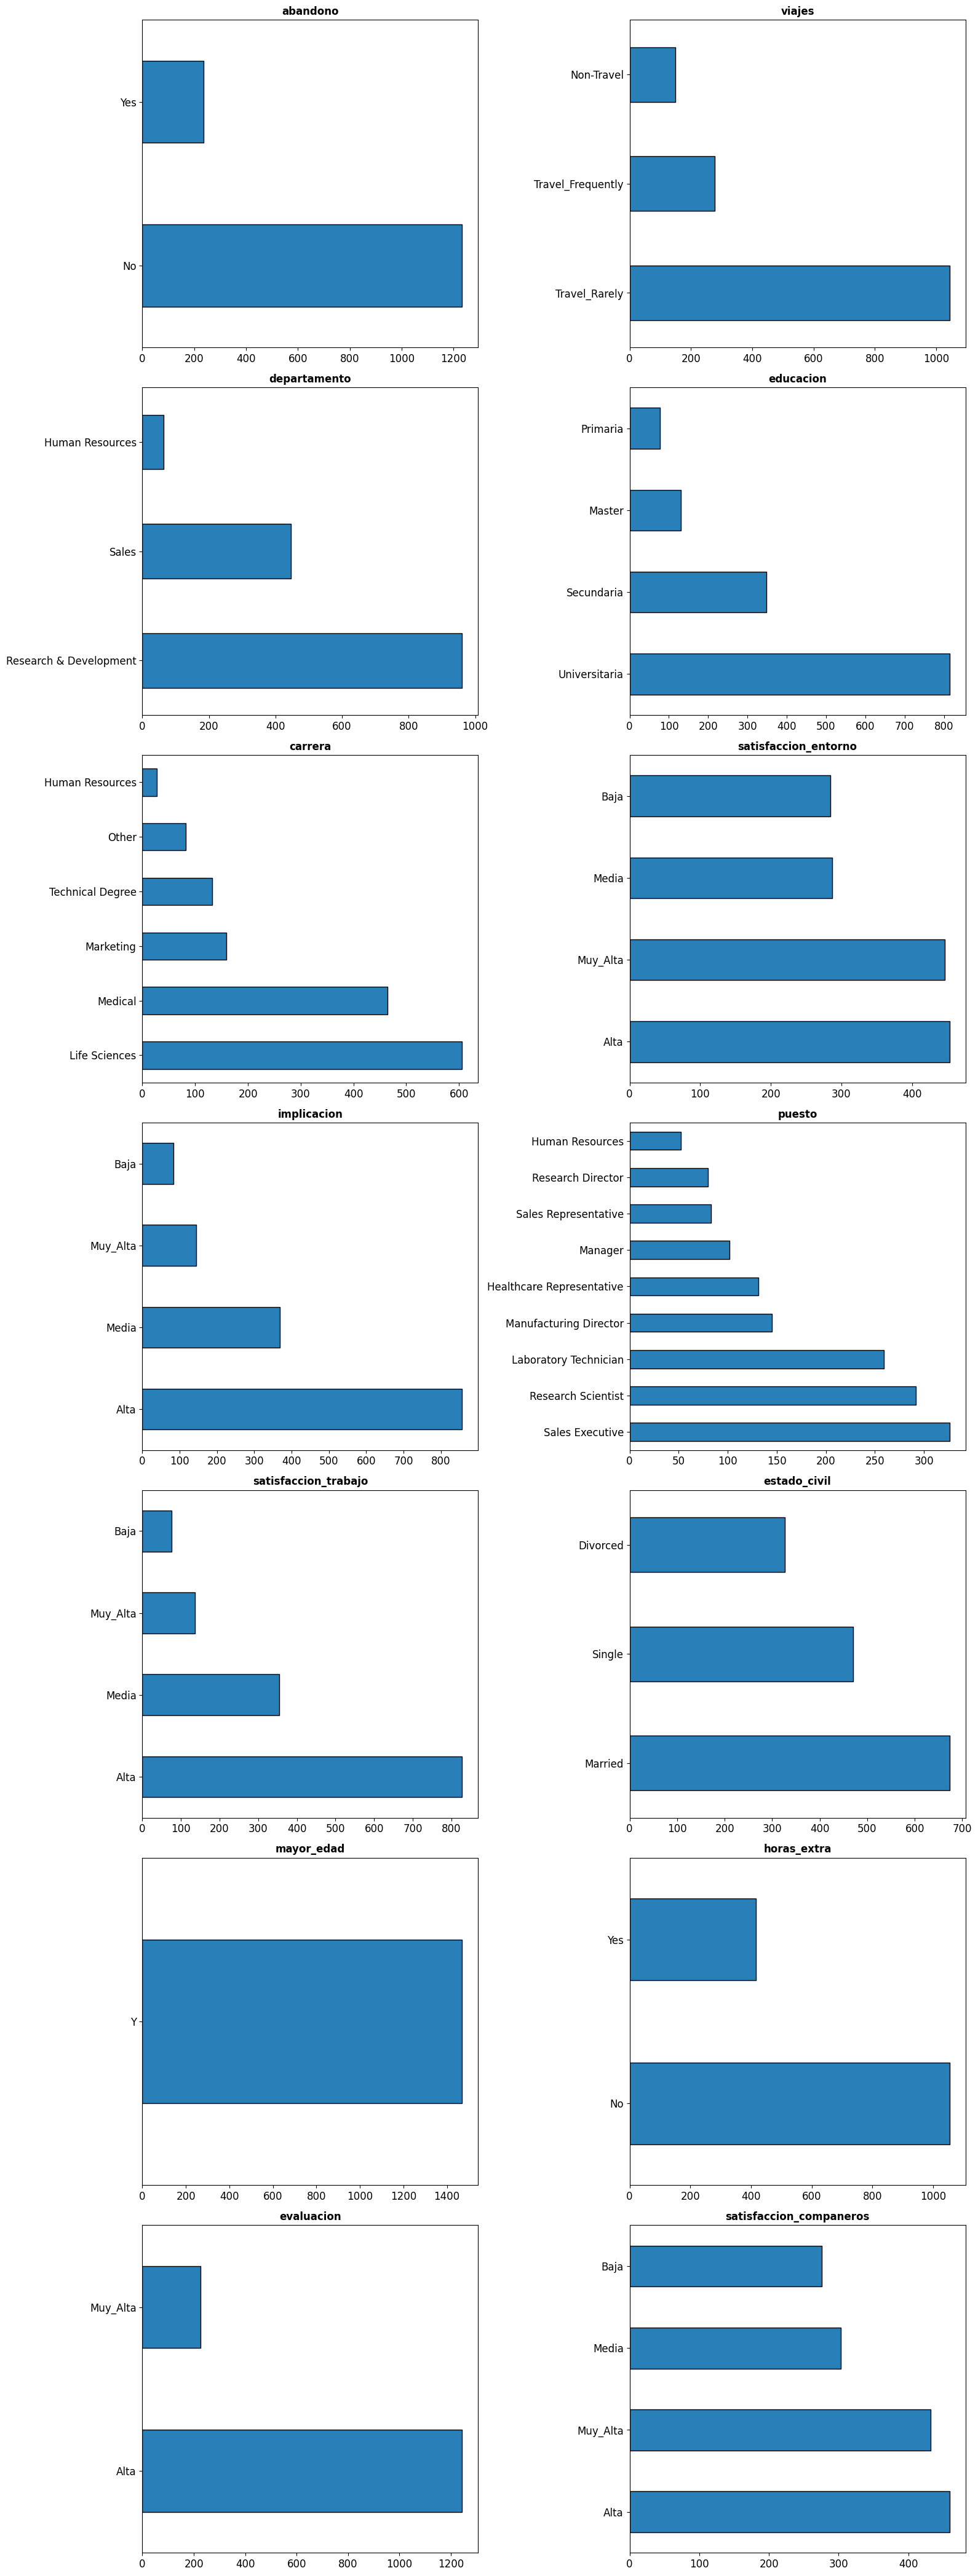

In [12]:
# Suponiendo que 'df_cat' es tu DataFrame con las columnas categóricas
num_vars = len(df_cat.columns)
num_rows = math.ceil(num_vars / 2)

# Creamos la figura y los ejes para los gráficos
fig, axs = plt.subplots(num_rows, 2, figsize=(16, 6 * num_rows))

# Creamos el bucle que va añadiendo gráficos
for i, variable in enumerate(df_cat.columns):
    row = i // 2
    col = i % 2

    # Graficamos el conteo de cada categoría en forma de barras horizontales
    df_cat[variable].value_counts().plot.barh(ax=axs.reshape(-1)[i], color="#2980b9", edgecolor='black', linewidth=1)

    # Configuramos el título y tamaño de fuente
    axs.reshape(-1)[i].set_title(variable, fontsize=12, fontweight="bold")
    axs.reshape(-1)[i].tick_params(labelsize=12)

# Eliminar cuadros vacíos
if num_vars % 2 != 0:
    fig.delaxes(axs[-1, -1])

# Ajustamos el diseño para evitar superposiciones
plt.tight_layout()
# Mostramos los gráficos
plt.show()

**Decisiones tomadas después, del EDA Categoricas:**

* Podemos apreciar que la variable `mayor_edad` solo tiene un valor, lo cuál no se pude categorizar, lo más conveniente es elimanarla. Pues, no me representa información.

* Sobre las imputaciones, ya se puede tener más claro, hacia donde se pueden imputar estas 3 variables:
`educacion:` imputaremos por 'Universitaria' por ser el valor que tiene más en demasia, `satisfaccion_trabajo:` imputamos por 'Alta', `implicacion:` imputamos por 'Alta'


In [13]:
# Eliminamos
df.drop(columns = 'mayor_edad', inplace = True)
# Imputamos
df['educacion'] = df['educacion'].fillna('Universitaria')
df['satisfaccion_trabajo'] = df['satisfaccion_trabajo'].fillna('Alta')
df['implicacion'] = df['implicacion'].fillna('Alta')

### EDA Variables Numéricas

In [14]:
def estadisticos_cont(num):
    # Calculamos describe
    estadisticos = num.describe().T
    # Añadimos la mediana
    estadisticos['median'] = num.median()
    # Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:, [0, 1, 8, 2, 3, 4, 5, 6, 7]]

    # Redondeamos los valores flotantes a 2 decimales, excluyendo "count"
    for col in estadisticos.columns:
        if col != "count" and estadisticos[col].dtype == 'float64':
            estadisticos[col] = estadisticos[col].apply(lambda x: "{:,.2f}".format(x))

    # Formateamos "count" para eliminar decimales
    estadisticos["count"] = estadisticos["count"].apply(lambda x: "{:,.0f}".format(x))

    # Lo devolvemos
    return estadisticos

In [15]:
# Llamada a la función con el DataFrame df
resultados = estadisticos_cont(df.select_dtypes('number'))
resultados

,count,mean,median,std,min,25%,50%,75%,max
edad,"1,470",36.92,36.00,9.14,18.00,30.00,36.00,43.00,60.00
distancia_casa,"1,470",9.19,7.00,8.11,1.00,2.00,7.00,14.00,29.00
empleados,"1,470",1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
sexo,"1,271",2.73,3.00,0.72,1.00,2.00,3.00,3.00,4.00
nivel_laboral,"1,470",2.06,2.00,1.11,1.00,1.00,2.00,3.00,5.00
salario_mes,"1,470","6,502.93","4,919.00","4,707.96","1,009.00","2,911.00","4,919.00","8,379.00","19,999.00"
num_empresas_anteriores,"1,470",2.69,2.00,2.50,0.00,1.00,2.00,4.00,9.00
incremento_salario_porc,"1,470",15.21,14.00,3.66,11.00,12.00,14.00,18.00,25.00
horas_quincena,"1,470",80.00,80.00,0.00,80.00,80.00,80.00,80.00,80.00
nivel_acciones,"1,470",0.79,1.00,0.85,0.00,0.00,1.00,1.00,3.00


**Decisiones tomadas después del EDA Númericas**

* Podemos apreciar que las variables `Empleados` y `Horas_quincena` solo cuentan con un valor, por lo cuál al igual que 'mayor_edad', no me generan información, lo cuál serán eliminadas.

* La variable `Sexo`, presenta 4 valores, y esta representado por números categorizados del 1 al 4, lo cuál no me permitiría explicarla, entonces será eliminada.

In [16]:
df.drop(columns = ['empleados','sexo','horas_quincena'], inplace = True)
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,puesto,satisfaccion_trabajo,estado_civil,salario_mes,num_empresas_anteriores,horas_extra,incremento_salario_porc,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,Sales Executive,Alta,Single,5993,8,Yes,11,Alta,Baja,0,8,0,6,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,Research Scientist,Media,Married,5130,1,No,23,Muy_Alta,Muy_Alta,1,10,3,10,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,Laboratory Technician,Media,Single,2090,6,Yes,15,Alta,Media,0,7,3,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,Research Scientist,Alta,Married,2909,1,Yes,11,Alta,Alta,0,8,3,8,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,Laboratory Technician,Alta,Married,3468,9,No,12,Alta,Muy_Alta,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,Laboratory Technician,Muy_Alta,Married,2571,4,No,17,Alta,Alta,1,17,3,5,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,Healthcare Representative,Media,Married,9991,4,No,15,Alta,Baja,1,9,5,7,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,Manufacturing Director,Muy_Alta,Married,6142,1,Yes,20,Muy_Alta,Media,1,6,0,6,0,3


### EDA Gráficos

Modelando algunos aspectos de la data, respecto a una variable muy importante como lo es salario_mensual

**Relación Salario_Mensual y Años de Experiencia**

<ipython-input-17-50f216954060>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='anos_experiencia', y='salario_mes', data=df, ci=None, edgecolor="black")


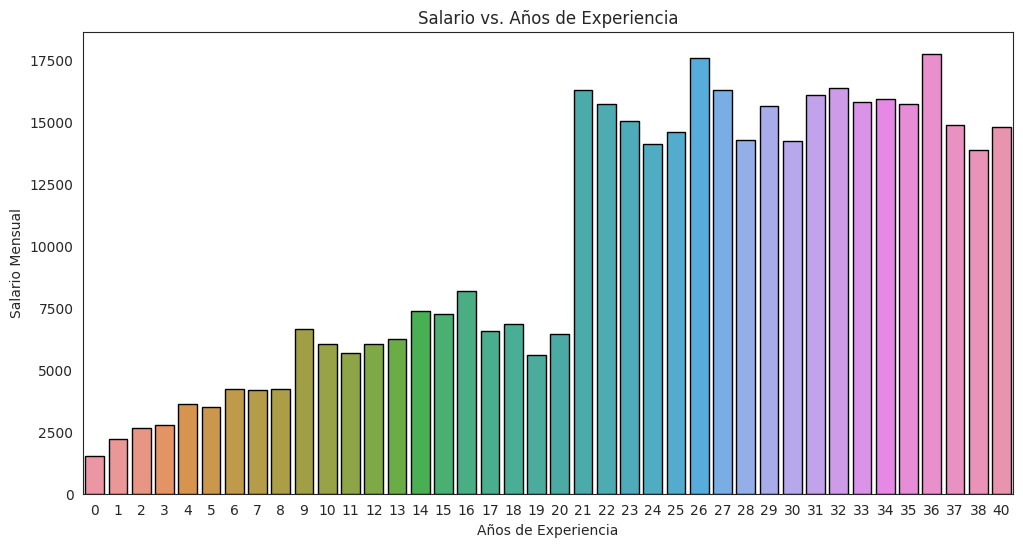

In [17]:
sns.set_style("white")
plt.figure(figsize=(12, 6))

sns.barplot(x='anos_experiencia', y='salario_mes', data=df, ci=None, edgecolor="black")
plt.title('Salario vs. Años de Experiencia')
plt.xlabel('Años de Experiencia')
plt.ylabel('Salario Mensual')
plt.show()

**Interpretación:**


*   Podemos ver que mientras mayor sean los años de experiencia mayor seran los salarios mensuales del trabajador.
*   También, se puede apreciar que apartir de los 20 años de experiencia los salarios crecen de forma muy notoria.

Quizas, nuestro objetivo de estudio, de predecir quienes abandonaran el trabajo es probable que sea alguién que se encuentre con pocos años de experiencia.

**Distribución de Salario Mensual por Nivel Laboral**

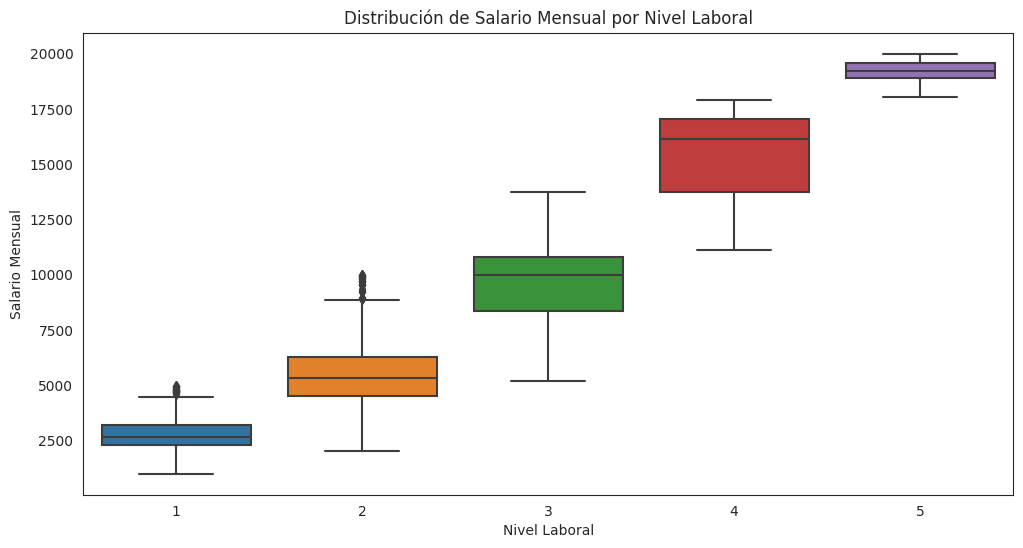

In [18]:
sns.set_style("white")
plt.figure(figsize=(12, 6))
sns.set_style("white")

sns.boxplot(x='nivel_laboral', y='salario_mes', data=df)
plt.title('Distribución de Salario Mensual por Nivel Laboral')
plt.xlabel('Nivel Laboral')
plt.ylabel('Salario Mensual')
plt.show()

**Interpretación:**


*   Se puede ver una clara tendencia que existe entre los salarios y nivel laboral, pues a mayor nivel laboral mayor salario.
*   Se podría decir que los buenos salarios reconfortantes empiezan en el nivel 3.

Esta información nos permite preguntarnos si las personas que se encuentran en un nivel laboral bajo, terminaran abandono su empleo, pues no presenta tanto riesgo cambiar de trabajo y percibir un sueldo parecido.

**Gráfico de Dispersión Edad y Salario_Mensual**

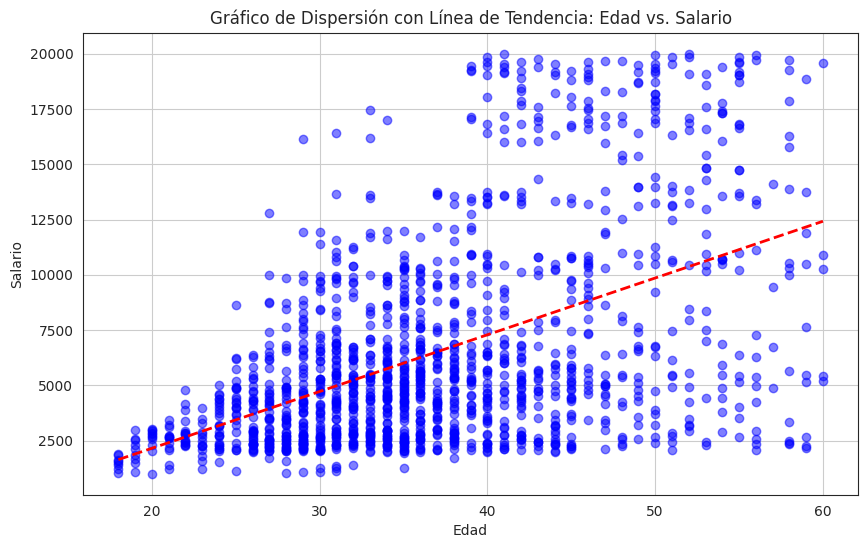

In [19]:
sns.set_style("white")
plt.figure(figsize=(10, 6))
plt.scatter(df['edad'], df['salario_mes'], alpha=0.5, color='b')

coefficients = np.polyfit(df['edad'], df['salario_mes'], 1)

trendline_x = np.array([min(df['edad']), max(df['edad'])])
trendline_y = coefficients[0] * trendline_x + coefficients[1]
plt.plot(trendline_x, trendline_y, color='r', linestyle='--', linewidth=2)

plt.title('Gráfico de Dispersión con Línea de Tendencia: Edad vs. Salario')
plt.xlabel('Edad')
plt.ylabel('Salario')
plt.grid(True)
plt.show()

**Interpretación**

*   Se puede ver claramente, a través de la linea de tendencia roja, que los salarios más altas se obtienen a través de los años.
*   Podríamos, preguntarnos, quienes estan sastifechos con sus salarios, pues los que estan arriba de la linea de tendencia perciben un salario bueno, mientras que las personas que estan debajo de la linea de tendencia su salario no estan reconfortante, y podrían decidir dejar el trabajo por el bajo riesgo de perdida.



### Conclusiones

Trás el EDA se tuvieron que eliminar variables, imputar variables y modelar la data para poder absolver dudas respecto a este caso.

Finalmente, tenemos el siguiente dataset, donde se trabajaran los INSIGHTS y los modelos de Machine Learning de clasificación.



In [20]:
df.head()

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,puesto,satisfaccion_trabajo,estado_civil,salario_mes,num_empresas_anteriores,horas_extra,incremento_salario_porc,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,Sales Executive,Alta,Single,5993,8,Yes,11,Alta,Baja,0,8,0,6,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,Research Scientist,Media,Married,5130,1,No,23,Muy_Alta,Muy_Alta,1,10,3,10,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,Laboratory Technician,Media,Single,2090,6,Yes,15,Alta,Media,0,7,3,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,Research Scientist,Alta,Married,2909,1,Yes,11,Alta,Alta,0,8,3,8,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,Laboratory Technician,Alta,Married,3468,9,No,12,Alta,Muy_Alta,1,6,3,2,2,2


In [21]:
df.shape

(1470, 25)

In [22]:
df.columns

Index(['edad', 'abandono', 'viajes', 'departamento', 'distancia_casa',
       'educacion', 'carrera', 'satisfaccion_entorno', 'implicacion',
       'nivel_laboral', 'puesto', 'satisfaccion_trabajo', 'estado_civil',
       'salario_mes', 'num_empresas_anteriores', 'horas_extra',
       'incremento_salario_porc', 'evaluacion', 'satisfaccion_companeros',
       'nivel_acciones', 'anos_experiencia', 'num_formaciones_ult_ano',
       'anos_compania', 'anos_desde_ult_promocion', 'anos_con_manager_actual'],
      dtype='object')

# 5 | INSIGHTS

Para la siguiente entrega, se presentaran los INSIGHTS tratando de responder las hipotesis planteadas.